<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/CircuitElement_inductance_Phasors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Phasors of Inductance</h1></b>

Dr. Bingsen Wang

6/18/2023
</center>

#Voltage and Current of Inductance

The relationship between the voltage $v_L$ across the indcutance and the current $i_L$ through the inductance with $v_L$ and $i_L$ following the **passive sign convention** can be described by
$$\begin{align}
v_L &= L\frac{di_L}{dt} \tag{1}\\
i_L &= \frac{1}{L}\int v_Ldt=i_L(t_0)+\frac{1}{L}\int_{t_0}^t v_L(\tau)d\tau\tag{2}
\end{align} $$

#Instantaneous Power

The instantaneous power $p(t)$ delivered to the indcuctance is
$$p(t)=v_Li_L \tag{3}$$

Substituting (1) in (3) yields
$$p(t) = {L\over 2}\frac{di_L^2}{dt}\tag{4}$$

Substituting (2) in (3) leads to
$$p(t) = \frac{v_L}{L}\int v_L dt\tag{5}$$

Equations (3)-(5) can be used to determine the instantaneous power delivered to an inductance although equation (5) is much less frequently used.

#Phasor

Let the voltage $v_L$ be sinisoudal
$$v_L = V_L\cos(\omega t +\theta_V)\tag{6}$$

Subtsituting (6) in (2) yields
$$i_L = \frac{V_L}{\omega L}\sin(\omega t + \theta_V) \tag{7}$$

The **phasor** $\hat V_L$ that corresponds to the instantaneous voltage $v_L$ only takes the amplitude and phase angle of the sinusoidal quantidy and leaves out the frequency, i.e.

$$\hat V_L = V_Le^{j\theta_V} \tag{8}$$

Another natation alternative to (8) is
$$\hat V_L = V_L\angle\theta_V \tag{9}$$

If you prefer some mathematical rationale that relates (8) and (6), here is some derivation.

Euler's identity is
$$e^{j\theta} = \cos\theta + j\sin\theta\tag{10}$$
Its conjugate is
$$e^{-j\theta} = \cos\theta - j\sin\theta\tag{11}$$

From (10) and (11) we have
$$\cos\theta = \frac{e^{j\theta} + e^{-j\theta}}{2}\tag{12}$$

Therefore, equation (6) can be rewritten as
$$v_L = V_L\frac{e^{j(\omega t+\theta_V)} + e^{-j(\omega t+\theta_V)}}{2}= Re(V_Le^{j(\omega t+\theta_V)})\tag{13}$$
where $Re()$ denotes the real component of a complex quantity.

At $t=0$
$$V_Le^{j(\omega t+\theta_V)} = V_Le^{j\theta_V} = \hat V_L\tag{14}$$

Since $\sin\theta = \cos(\theta-\pi/2)$, (7) can be rewritten as
$$i_L = \frac{V_L}{\omega L}\cos\left(\omega t + \theta_V-{\pi\over2}\right)=Re\left[\frac{V_L}{\omega L}e^{j\left(\omega t + \theta_V-{\pi\over2}\right)}\right]\tag{15}$$

Therefore, the current phasor is
$$\hat I_L = \frac{V_L}{\omega L}e^{j\left(\theta_V-{\pi\over2}\right)}=\frac{V_Le^{j\theta_V}}{\omega L}e^{-j{\pi\over2}}\tag{16}$$

Substituting (8) and $e^{-j{\pi\over2}} = {1\over j}$ in (16) yields
$$\hat I_L = \frac{\hat V_L}{j\omega L}\tag{17}$$
The quantity $j\omega L$ in (17) is commonly known as the **impedance**.

#Complex Power

The complex power $S$ delivered to a complex impedance $Z$ is
$$S = \frac{\hat V\hat I^*}{2}\tag{18}$$
where $\hat V$ and $\hat I$ are based on the amplitude. $\hat I^*$ denotes the conjugate of $\hat I$.

If the phasor magnitude takes the root-mean-square (RMS) values instead of the amplitude of the sinusoidal quantity, then the complex power is
$$S = \hat V_{rms}\hat I^*_{rms}\tag{19}$$
The subscript $_{rms}$ in (19) is often omitted as long as the phasor magnitude being based on RMS value is clear in the context.

The real power $P$ and the reactive power $Q$ is the real and imaginary component of $S$, i.e.
$$S = P + jQ\tag{20}$$

Since $\hat V_{rms} = Z\hat I_{rms}$, the complex power can also be determined by
$$S = |\hat I_{rms}|^2Z = \frac{|\hat V_{rms}|^2}{Z^*}\tag{21}$$

Specifically for an inductance, the complex power is
$$S_L = \hat V_{L\_rms}\hat I^*_{L\_rms}=j\omega L|\hat I_{L\_rms}|^2 = \frac{|\hat V_{L\_rms}|^2}{-j\omega L}\tag{22}$$

The real and reactive powers are
$$\begin{align}P_L&=0
\\Q_L &= \omega L|\hat I_{L\_rms}|^2 = \frac{|\hat V_{L\_rms}|^2}{\omega L}\end{align}\tag{23}$$

#Python Code


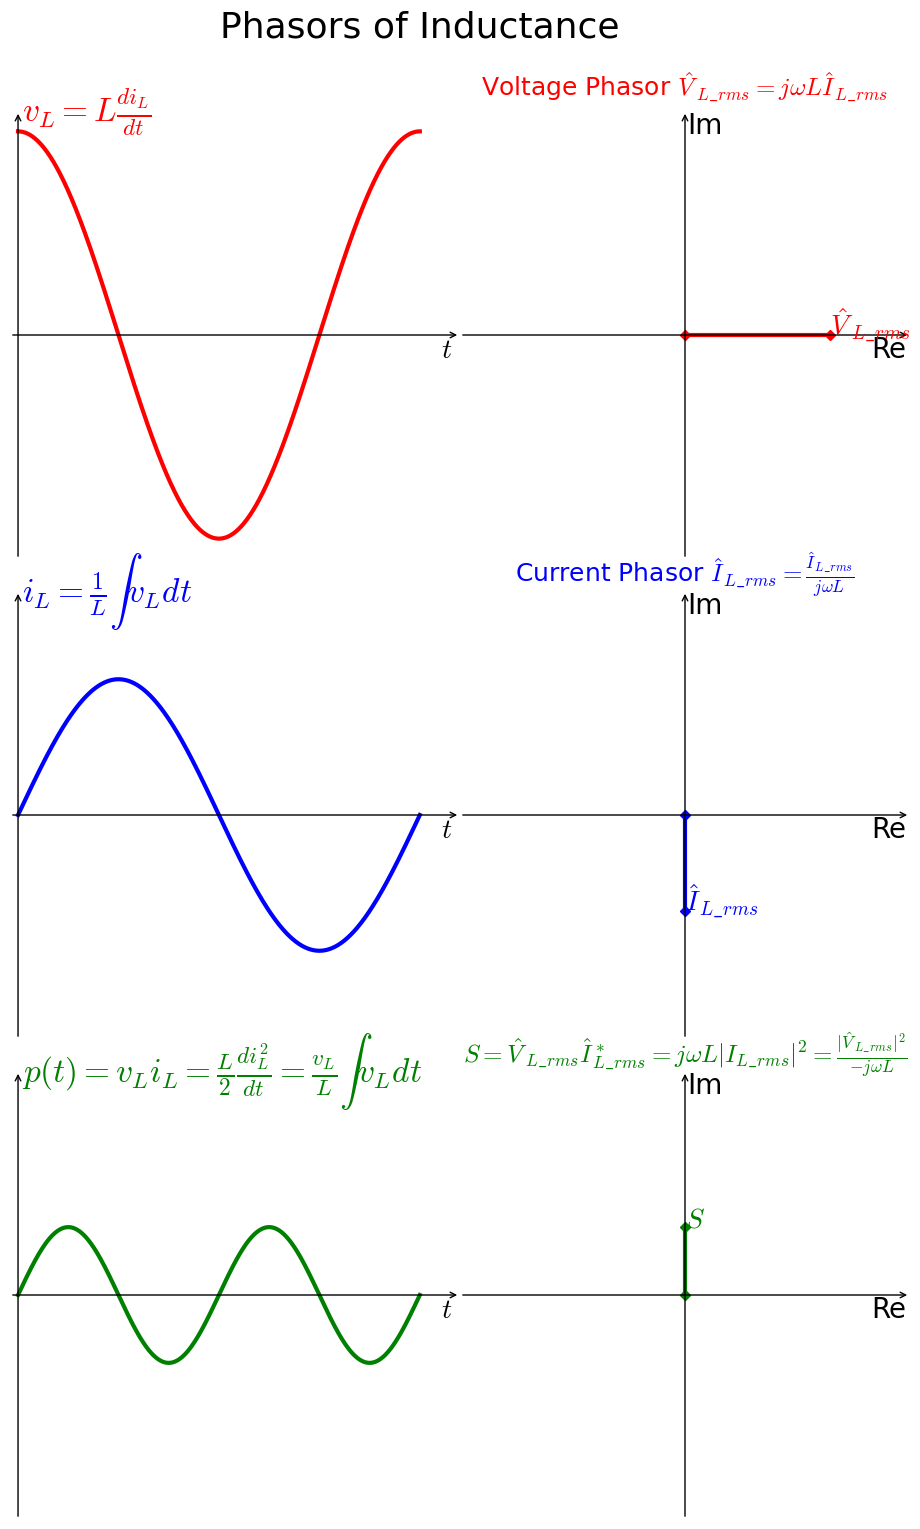

In [ ]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

#parameters
Nf = 360
t=linspace(0,1,512)
theta_V = linspace(0,2*pi,Nf)
L=1.5/(2*pi)
fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax_frame = [[[0,.6, .5, .28],[-.02,1.1],[-1.1,1.1]], #v_L
            [[0,.3, .5, .28],[-.02,1.1],[-1.1,1.1]], #i_L
            [[0,0, .5, .28],[-.02,1.1],[-1.1,1.1]], #p(t)
            [[0.5,.6, .5, .28],[-1.1,1.1],[-1.1,1.1]], #phasor V_L
            [[0.5,.3, .5, .28],[-1.1,1.1],[-1.1,1.1]], #phasor I_L
            [[0.5,0, .5, .28],[-1.1,1.1],[-1.1,1.1]], # S
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[[r'$v_L = L\frac{di_L}{dt}$', '$t$'],
        [r'$i_L = \frac{1}{L}\int v_L dt$', '$t$'],
        [r'$p(t) = v_Li_L = \frac{L}{2}\frac{di_L^2}{dt}=\frac{v_L}{L}\int v_L dt$', '$t$'],
        ['Im', 'Re'],
        ['Im', 'Re'],
        ['Im', 'Re'],
        ] #variables for yx axes of each subplot
clst=['r','b','g','r','b','g'] #colors of lines
ax_lst=[] #axis list or the list of subplots
lines = [] #array containing all the line segments
tx_lst=[]
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  ax.text(xm-.02,0,ax_lbl[k][-1],size=20,va='top',ha='right') #x-axis label
  if k<3:
    lines.append(ax.plot([], [], color=clst[k], lw=3)[0]) #lines to plot
    ax.text(0.01,ym,ax_lbl[k][0],size=24,va='center',color=clst[k]) #y label
  else:
    lines.append(ax.plot([], [], color=clst[k], marker='D',markersize=5,lw=3)[0]) #lines to plot
    ax.text(0.01,ym,ax_lbl[k][0],size=20,va='top') #y label
    tx_lst.append(ax.text(0,0,'',color=clst[k],size=20))
ax_lst[0].text(1,ax_frame[0][2][1]+0.5,'Phasors of Inductance',va='top',ha='center',size=26)
ax_lst[3].text(0,ax_frame[3][2][1]+.2,r'Voltage Phasor $\hat V_{L\_rms} =j\omega L\hat I_{L\_rms}$',
               color=clst[3],va='top',ha='center',size=18)
ax_lst[4].text(0,ax_frame[4][2][1]+.2,r'Current Phasor $\hat I_{L\_rms} =\frac{\hat I_{L\_rms}}{j\omega L}$',
               color=clst[4],va='top',ha='center',size=18)
ax_lst[5].text(0,ax_frame[5][2][1]+.2,r'$S =\hat V_{L\_rms}\hat I^*_{L\_rms}=j\omega L|I_{L\_rms}|^2 = \frac{|\hat V_{L\_rms}|^2}{-j\omega L}$',
               color=clst[5],va='top',ha='center',size=18)
# animation function. This is called sequentially
def animate(i):
  V_L = 0.8+0.2*cos(theta_V[i]) #amplitude varying
  vL = V_L*cos(2*pi*t+theta_V[i]) #instantaneous voltage
  iL=V_L/(2*pi*L)*sin(2*pi*t+theta_V[i]) #instantaneous current
  VL_rms = V_L/np.sqrt(2) #voltage phasor magnitude in rms
  IL_rms = VL_rms/(2*pi*L) #current phasor magnitude in rms
  pt = vL*iL #instantaneous power
  S = 1j*VL_rms*IL_rms
  lines[0].set_data(t,vL)
  lines[1].set_data(t,iL)
  lines[2].set_data(t,pt)
  lines[3].set_data([0,VL_rms*cos(theta_V[i])],[0,VL_rms*sin(theta_V[i])])
  lines[4].set_data([0,IL_rms*cos(theta_V[i]-pi/2)],[0,IL_rms*sin(theta_V[i]-pi/2)])
  lines[5].set_data([0,S.real],[0,S.imag])
  tx_lst[0].set_position([VL_rms*cos(theta_V[i]),VL_rms*sin(theta_V[i])])
  tx_lst[0].set_text(r'$\hat V_{L\_rms} $')
  tx_lst[1].set_position([IL_rms*cos(theta_V[i]-pi/2),IL_rms*sin(theta_V[i]-pi/2)])
  tx_lst[1].set_text(r'$\hat I_{L\_rms} $')
  tx_lst[2].set_position([S.real,S.imag])
  tx_lst[2].set_text(r'$S $')
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = "circuitElement_inductancePhasor.mp4"
writervideo = animation.FFMpegWriter(fps=60)
anim.save(fn, writer=writervideo,dpi = 120)
